### Aim

The aim of this lab is to review basics of graph theory.

### Objectives

At the end of this lab, students should be able to:
1. Generate graphs in Python
2. Interpret entries of powers of the adjacency matrix
3. Plot graphs in Python

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Background Knowledge

Conceptually, a *graph* consists of vertices and edges connecting the vertices. In Python, graphs can be constructed using the library *networkx* usually imported as *nx*. Graphs may be *directed* or *undirected* and *self-loops* and *parallel edges* may be allowed or not allowed. Note that the library *networkx* is mainly designed for graph computations. There are plotting tools in *networkx*, but they are very limited. For instance, while self-loops and parallel edges may exist in a graph, they won't be shown on the plot. 

In *networkx*, there are the following classes:
* `Graph` - underected graph with self-loops but without parallel edges
* `DiGraph` - directed graph with self-loops but without parallel edges
* `MultiGraph` - underected graph with self-loops and parallel edges
* `MultiDiGraph` - derected graph with self-loops and parallel edges

In this class, we will work with undirected graphs. Usually we won't have self-loops. 

### Example

Here is a graph

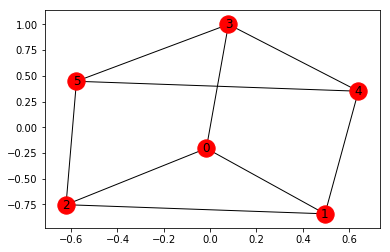

In [2]:
G = nx.circular_ladder_graph(3)

nx.draw_networkx(G)
plt.show()

### Basic definitions

Formally, a *graph* is a pair of sets $G=(V,E)$ comprising a set $V$ of *vertices* with a set $E\subset V\times V$ of *edges*, which are formed by pairs of vertices. In the example above, vertices have been labelled by 
$$V=\{0,1,2,3,4,5\}.$$

The edge set is 
$$E=\{\{0,1\},\{0,2\},\{0,3\},\{1,2\},\{1,4\},\{2,5\},\{3,4\},\{3,5\}, \{4,5\}\}.$$

The *adjacency matrix* of a graph $G=(V,E)$ is an $n\times n$ matrix $A=(a_{ij})$ where $n$ is the number of vertices. Rows and columns of $A$ are indexed by vertices of the graph $G$ and each entry $a_{ij}$ is either 0, if there is no edge from $i$ to $j$, or 1, if there is an edge from $i$ to $j$.

Note that $a_{ij}=a_{ji}$ for underected graphs, i.e., the matrix $A$ is symmetric, $A=A^{t}$. For directed graphs, the matrix $A$ is not necessarily symmetric. Futher, for graphs without parallel edges, we have $a_{ij}\in\{0,1\}$ for all $i,j\in V$ and if parallel edges were allowed, then $a_{ij}$ would be the number of edges connecting vertices $i$ and $j$.

The *degree* of a vertex is the number of edges that are incident to it, or touch it. For instance, degrees of all vertices in the example above are 3. If degrees of all vertices are equal, such a graph is called *regular*. For instance, the graph above is 3-regular. Note that if graphs were directed, we would have to distinguish the *in-degree* (the number of edges to the vertex) and the *out-degree* (the number of edges from the vertex).

A *walk* in a graph is a sequence of edges connecting a sequence of vertices. The length of a walk is the number of edges in it. For example, 2 - 0 - 3 - 0 - 1 is a walk of length 4 in the above graph. A *trail* is a walk in which all edges are distinct. For example, the walk 2 - 0 - 3 - 0 - 1 is not a trail since the edge from 0 to 3 is traversed twice, but the walk 0 - 1 - 2 - 0 - 3 is a trail. A *path* is a trail in which all vertices, except possibly for the first and the last, are distinct. For instance, 0 - 1 - 2 - 0 - 3 is not a trail but 0 - 1 - 2 - 0 is. Finally, a *cycle* is a closed path.

A graph is called *connected* if there is a walk from each vertex to each vertex. Otherwise it's called *disconnected*.

### Example

The adjacency matrix of the graph above is
$$
A=
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 & 1 \\
0 & 1 & 0 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 & 1 & 0
\end{bmatrix}
$$

Note that we can generate a graph from its adjacency matrix in *networkx*:

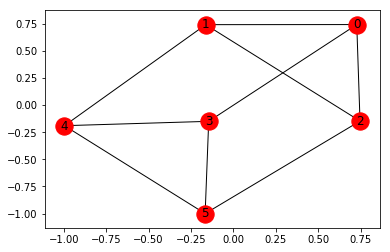

In [3]:
A = np.mat([[0 , 1 , 1 , 1 , 0 , 0],
            [1 , 0 , 1 , 0 , 1 , 0],
            [1 , 1 , 0 , 0 , 0 , 1],
            [1 , 0 , 0 , 0 , 1 , 1],
            [0 , 1 , 0 , 1 , 0 , 1],
            [0 , 0 , 1 , 1 , 1 , 0]])

G = nx.Graph(A)
nx.draw_networkx(G)
plt.show()

## Exercise 1

What is the adjacency matrix of the following graph?

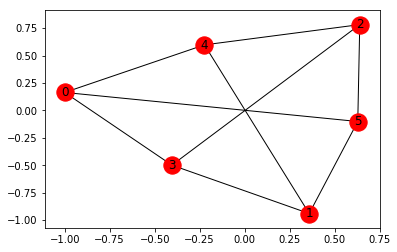

In [4]:
H = nx.Graph()
H.add_nodes_from(range(0,6))
H.add_edges_from([(0,3),(0,4),(0,5),(1,3),(1,4),
                       (1,5),(2,3),(2,4),(2,5)])
nx.draw_networkx(H)
plt.show()

## Solution

See the code below

In [5]:
A = np.mat([[0, 0, 0, 1, 1, 1], 
            [0, 0, 0, 1, 1, 1], 
            [0, 0, 0, 1, 1, 1], 
            [1, 1, 1, 0, 0, 0], 
            [1, 1, 1, 0, 0, 0], 
            [1, 1, 1, 0, 0, 0]])
print(A)

[[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]]


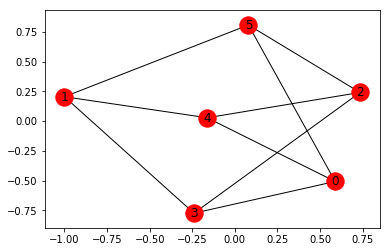

In [6]:
H_from_A = nx.Graph(A)
nx.draw_networkx(H_from_A)
plt.show()

Note that the two plots are not exactly the same. However, any two vertices are connected by an edge in the first plot if and only if they are connected in the second plot. Thus it is the same graph, only plotted differently.

## Exercise 2

How can we extract vertex degress directly from the adjacency matrix, i.e., without plotting the graph and counting the degrees?

## Solution

The degree of a vertex $v$ is the sum of all entries in row $v$ or column $v$ (they are the same since the adjacency matrix is symmetric).

Below is an example.

First, we will generate some graph

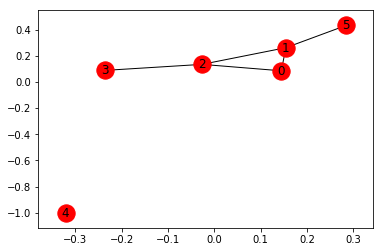

In [7]:
G = nx.Graph()
G.add_nodes_from(range(0,6))
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 5), (2, 3)])
nx.draw_networkx(G)
plt.show()

Vertex degrees are

In [8]:
print(G.degree())

[(0, 2), (1, 3), (2, 3), (3, 1), (4, 0), (5, 1)]


The adjacency matrix is

In [9]:
A = np.mat([[0, 1, 1, 0, 0, 0], 
            [1, 0, 1, 0, 0, 1], 
            [1, 1, 0, 1, 0, 0], 
            [0, 0, 1, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0], 
            [0, 1, 0, 0, 0, 0]])
print(A)

[[0 1 1 0 0 0]
 [1 0 1 0 0 1]
 [1 1 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]]


Here are sums of entries in each column

In [10]:
print(np.sum(A, axis = 0))

[[2 3 3 1 0 1]]


Here are sums of entries in each row. They are, of course, the same

In [11]:
print(np.sum(A, axis = 1))

[[2]
 [3]
 [3]
 [1]
 [0]
 [1]]


## Exercise 3

Given a graph with an adjacency matrix $A$ what do entries of matrices $A^2$, $A^3$ etc represent? If you can't figure it out, google the answer. Note that a proof is not required here, but it's a good idea to try to prove the answer.

Below an example of a graph and powers of its adjacency matrix for your reference. 

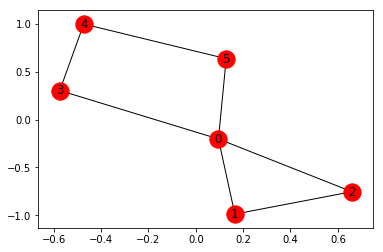

In [12]:
A = np.mat([[0, 1, 1, 1, 0, 1], 
            [1, 0, 1, 0, 0, 0], 
            [1, 1, 0, 0, 0, 0], 
            [1, 0, 0, 0, 1, 0], 
            [0, 0, 0, 1, 0, 1], 
            [1, 0, 0, 0, 1, 0]])

G = nx.from_numpy_matrix(A)
nx.draw_networkx(G)
plt.show()

In [13]:
print(A)

[[0 1 1 1 0 1]
 [1 0 1 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]


In [14]:
B = A ** 2
print(B)

[[4 1 1 0 2 0]
 [1 2 1 1 0 1]
 [1 1 2 1 0 1]
 [0 1 1 2 0 2]
 [2 0 0 0 2 0]
 [0 1 1 2 0 2]]


In [15]:
C = A ** 3
print(C)

[[2 5 5 6 0 6]
 [5 2 3 1 2 1]
 [5 3 2 1 2 1]
 [6 1 1 0 4 0]
 [0 2 2 4 0 4]
 [6 1 1 0 4 0]]


## Solution

If $X = A^n$, then the entry $x_{ij}$ is the number of walks of length $n$ from vertex $i$ to vertex $j$ in the original graph.

For example, there are 5 walks of length 3 from 0 to 1 in the graph above:
* 0 - 1 - 0 - 1
* 0 - 5 - 0 - 1
* 0 - 3 - 0 - 1
* 0 - 2 - 0 - 1
* 0 - 1 - 2 - 1

## Exercise 4

Let $A$ be the adjacency matrix of a graph $G$. What do diagonal entries of $A^2$ represent?

## Solution

The entry $x_{ii}$ in $A^2$ is the number of walks of length $2$ from $i$ to $i$, i.e. the number of edges adjacent to $i$ (since every walk of length $2$ from $i$ to $i$ goes along one of these edges to go out of $i$ and re-use it for going back to $i$. So it is just the degree of that vertex.

In [16]:
print('Vertex degrees from the graph: ', nx.degree(G))
print('Vertex degrees from A: ', np.sum(A, 0))
print('Vertex degrees from diagonal of A^2: ', np.diag(A ** 2))

Vertex degrees from the graph:  [(0, 4), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2)]
Vertex degrees from A:  [[4 2 2 2 2 2]]
Vertex degrees from diagonal of A^2:  [4 2 2 2 2 2]


# Exercise 5

Given a graph $G$ without self-loops, let $A$ be its adjacency matrix $A$. Further, let $G'$ be the same graph as $G$ but with a self-loop added at each vertex. Let $A'$ be the adjacency matrix of the graph $G'$.

### Part (a)

What is $A'$ in terms of $A$?

### Part (b)

Let $X = A'^n$. Prove that $x_{ij}>0$ if and only if there is a walk of length at most $n$ from vertex $i$ to vertex $j$ in $G$.

### Part (c)

If $X=A'^n$, is it true that $x_{ij}$ is the number of walks of length at most $n$ from vertex $i$ to vertex $j$ in $G$?

## Solution

### Part (a)

$A' = A + I$, where $I$ is the identity matrix

### Part (b)

Let $X=A'^n$. If $x_{ij}>0$, then there exists at least one walk of length $n$ in $G'$ from $i$ to $j$. Removing all self loops from it, we get a walk of length at most $n$ in $G$.

Conversely, if there is a walk of length at most $n$ from $i$ to $j$ in $G$, then we can add a self-loop from $i$ to $i$ several times to construct a walk from $i$ to $j$ of length exactly $n$.

### Part (c)

No, it is not true. A simple example is
$$
A = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix},\qquad
A' = 
\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix}
$$

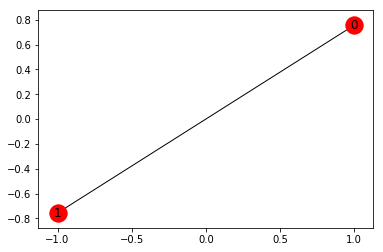

In [17]:
A = np.mat([[0, 1],
           [1, 0]])

nx.draw_networkx(nx.Graph(A))
plt.show()

In [18]:
Aprime = A + np.eye(2)
print(Aprime)

[[1. 1.]
 [1. 1.]]


In [19]:
print(Aprime ** 3)

[[4. 4.]
 [4. 4.]]


Thus there are 4 walks of length 3 from 0 to 1 in $G'$:
* 0 - 0 - 0 - 1
* 0 - 0 - 1 - 1
* 0 - 1 - 1 - 1
* 0 - 1 - 0 - 1

And yet there are only 2 walks of length at most 3 from 0 to 1 in $G$:
* 0 - 1
* 0 - 1 - 0 - 1

## Exercise 6

Given a graph $G$ without self-loops, let $A$ be its adjacency matrix. Write a **single** Python command (no loops allowed) that detects whether $G$ is connected. In particular, your command should print `True` or `1` if the graph is connected and `False` or `0` otherwise.

Your command should work for any square input matrix $A$ of arbitrary size. You must also explain how your command works.

Below is a Python command that generates and plots a random graph with $10$ vertices. It may or may not be connected. You can use this data to test your command, but your command should not rely on the fact that the number of vertices is $10$.

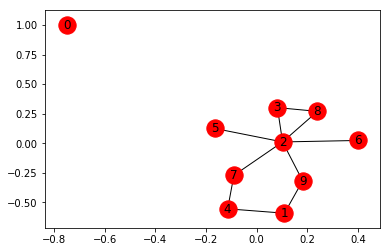

In [20]:
A = np.random.rand(10,10) < 0.25
A = np.triu(A, 1)
A = np.mat(1 * (A + A.T))
G = nx.from_numpy_matrix(A)
nx.draw_networkx(G)
plt.show()

# Solution

Note that a graph $G$ with $n$ vertices is connected if and only if there is a walk of length at most $n-1$ from each vertex to each vertex. By the previous exercise, this happens if and only if all entries of the matrix $(A+I)^{n-1}$ are nonzero. Thus the command we want is the following

In [21]:
np.all((A + np.eye(len(A))) ** (len(A) - 1))

False

# Conclusion

In today's lab, we covered some material familiar from Discrete Mathematics (graphs) and some new material (adjacency matrices). We have learned how to work with graphs in Python. 

However, note that the main purpose of this lab was to relate graphs, matrices, and programming in Python rather than to develop efficient graph theory algorithms. For instance, the method of determining connectivity of a graph from its adjacency matrix as in Exercise 6 may not be efficient for very large graphs and in practice it is better to use existing functionality of *networkx* whenever it is available. For details, you can read the manual of *networkx*.

Now please fill the following survey form to provide your feedback on the course:

https://tinyurl.com/mh2401-week4-feedback

For instance, the course instructors need to know if this handout is sufficient to understand the material and if lab assistants are helpful and their explanations are clear.